# Cleaning Data


## Data Challange

### Diagnosing data cleaning problems using simple pandas and visualizations

Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following:

- .head() prints the header of a DataFrame
- .dtypes prints datatypes of all columns in a DataFrame
- .info() provides a bird's eye view of column data types and missing values in a DataFrame
- .describe() returns a distribution of numeric columns in your DataFrame
- .isna().sum() allows us to break down the number of missing values per column in our DataFrame
- .unique() finds the number of unique values in a DataFrame column




### The Dataset

This dataset (airbnb.csv) contains data on airbnb listings in the state of New York. It contains the following columns:

- listing_id: The unique identifier for a listing
- description: The description used on the listing
- host_id: Unique identifier for a host
- host_name: Name of host
- neighbourhood_full: Name of boroughs and neighbourhoods
- coordinates: Coordinates of listing (latitude, longitude)
- Listing added: Date of added listing
- room_type: Type of room
- rating: Rating from 0 to 5.
- price: Price per night for listing
- number_of_reviews: Amount of reviews received
- last_review: Date of last review
- reviews_per_month: Number of reviews per month
- availability_365: Number of days available per year
- Number of stays: Total number of stays thus far



By merely looking at the data, we can already diagnose a range of potential problems down the line such as:



- Data type problems:




- Missing data problems:



- Text/categorical data problems:

Your code and solution must contain an analysis of 

- Data types
- Statistic summary
- Missing data
- How many values of different room_types do we have?
- Cleaning data 
    - Remove "(" and ")" from coordinates and split column into two
    - Assign correct columns to latitude and longitude columns in airbnb
    - Convert latitude and longitude to float
    - Drop coordinates column. This means, you should have two columns  latitude	longitude containing respective data
    - Remove ($) from price
    - Convert price to float
    - Calculate mean of price
    - Convert listing_added and last_review columns to datetime
    
- Consistency 
    - unique values
    - Are there any listings with listing_added > last_review
    - Print unique values of `room_type`
    - Deal with capitalized values `room_type`
    - Deal with trailing spaces `room_type`
    - Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable)
    - Divide neighbourhood_full into 2 columns and making sure they are clean
    - Create borough and neighbourhood columns
    - Drop neighbourhood_full column
    - Print out unique values of borough and neighbourhood
    - Strip white space from neighbourhood column
    - Make sure we set the correct maximum for rating column out of range values
    - Isolate rows of rating > 5.0
    - Drop these rows and make sure we have effected changes
    - Visualize (histogram) the rating column again using seaborn or matplotlib
    - Get the maximum value

- Let's deal with duplicate data
    - Find duplicates
    - Remove identical duplicates
    - Find non-identical duplicates
    - Show all duplicates


**Deadline Sunday 10th**

#HappyCoding






# Abriendo el archivo csv de airbnb

In [1]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset
df = pd.read_csv('airbnb.csv', index_col=0)
df.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [3]:
#Tipos de datos
df.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [4]:
# Resumen estadistico simple 
df.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


In [5]:
#revisando algunos valores de name
df['name'].value_counts().head()

Beautiful Brooklyn Brownstone       5
New york Multi-unit building        5
Hillside Hotel                      4
Home away from home                 4
Loft Suite @ The Box House Hotel    3
Name: name, dtype: int64

In [6]:
#revisando algunos valores de host_name
df['host_name'].value_counts().head()

Michael         89
David           85
Sonder (NYC)    66
Alex            52
Daniel          50
Name: host_name, dtype: int64

In [7]:
#revisando algunos valores de room_type
df['room_type'].value_counts().head()

Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
Name: room_type, dtype: int64

In [8]:
#Datos vacios por columna
df.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

In [9]:
# Numero de habitaciones por tipo
df['room_type'].value_counts()

Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: room_type, dtype: int64

## Limpiando los datos

In [10]:
#diviidir la columna de coordenadas en latitud y longitud
df[['latitude','Longuitude']]=df.coordinates.str.split(',',expand=True)
df.drop(['coordinates'],axis=1, inplace=True)
df.head()

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,(40.63222,-73.93398)
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,(40.78761,-73.96862)
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,(40.7007,-73.99517)
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,(40.79169,-73.97498)
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,(40.71884,-73.98354)


In [11]:
#eliminando los parentesis de las columnas de latitud y longitud
df['latitude'] = df['latitude'].str.replace('(','')
df['Longuitude'] = df['Longuitude'].str.replace(')','')
df.head()

C:\Users\Bacs\AppData\Local\Temp\ipykernel_50340\4152388102.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['latitude'] = df['latitude'].str.replace('(','')
C:\Users\Bacs\AppData\Local\Temp\ipykernel_50340\4152388102.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Longuitude'] = df['Longuitude'].str.replace(')','')


,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [12]:
df.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
Longuitude             object
dtype: object

In [13]:
#convirtiendo las columnas de latitud y longitud en float
df['latitude']=df['latitude'].astype(float)
df['Longuitude']=df['Longuitude'].astype(float)
df.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
Longuitude            float64
dtype: object

In [14]:
#borrando el signo de $ de la columna de price
df['price'] = df['price'].str.replace('$','')
df.head()

C:\Users\Bacs\AppData\Local\Temp\ipykernel_50340\334343085.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [15]:
#convirtiendo la columna de price en float
df['price']=df['price'].astype(float)
df.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
room_type              object
price                 float64
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
Longuitude            float64
dtype: object

In [16]:
#calculando la media de los precios
df['price'].mean()

150.90512217564665

In [17]:
#asignando el tipo de dato fecha a la columna de last_review y listin_added 
df['last_review']=pd.to_datetime(df['last_review'])
df['listing_added']=pd.to_datetime(df['listing_added'])
df.dtypes

listing_id                     int64
name                          object
host_id                        int64
host_name                     object
neighbourhood_full            object
room_type                     object
price                        float64
number_of_reviews              int64
last_review           datetime64[ns]
reviews_per_month            float64
availability_365               int64
rating                       float64
number_of_stays              float64
5_stars                      float64
listing_added         datetime64[ns]
latitude                     float64
Longuitude                   float64
dtype: object

In [18]:
#listad de airbnb que su ultima revision es mayor a la fecha de publicacion lo cual es un error
df[df['listing_added']>df['last_review']]

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354
50,20783900,Marvelous Manhattan Marble Hill Private Suites,148960265,Randy,"Manhattan, Marble Hill",Private room,93.0,7,2018-10-06,0.32,0,4.868036,8.4,0.609263,2020-02-17,40.87618,-73.91266
60,1908852,Oversized Studio By Columbus Circle,684629,Alana,"Manhattan, Upper West Side",Entire home/apt,189.0,7,2016-05-06,0.13,0,4.841204,8.4,0.725995,2017-09-17,40.77060,-73.98919
124,28659894,Private bedroom in prime Bushwick! Near Trains!!!,216235179,Nina,"Brooklyn, Bushwick",Private room,55.0,4,2019-04-12,0.58,358,4.916252,4.8,0.703117,2020-08-23,40.69988,-73.92072
511,33619855,Modern & Spacious in trendy Crown Heights,253354074,Yehudis,"Brooklyn, Crown Heights",home,150.0,6,2019-05-27,2.50,148,3.462432,7.2,0.610929,2020-10-07,40.66387,-73.93840
521,25317793,Awesome Cozy Room in The Heart of Sunnyside!,136406167,Kara,"Queens, Sunnyside",Private room,65.0,22,2019-06-11,1.63,131,4.442485,26.4,0.722388,2020-10-22,40.74090,-73.92696


In [19]:
#eliminando los datos que tienen error
df.drop(df[df['listing_added']>df['last_review']].index, inplace=True)
df[df['listing_added']>df['last_review']]

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude


In [20]:
#listando los tipos de habitaciones
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [21]:
#transformando los tipos de habitaciones en mayusculas
df['room_type']=df['room_type'].str.upper()
df['room_type'].unique()

array(['PRIVATE ROOM', 'ENTIRE HOME/APT', 'PRIVATE', 'SHARED ROOM',
       'HOME', '   SHARED ROOM      '], dtype=object)

In [22]:
#eliminando los espacios en blanco de la columna de room_type
df['room_type']=df['room_type'].str.strip()
df['room_type'].unique()

array(['PRIVATE ROOM', 'ENTIRE HOME/APT', 'PRIVATE', 'SHARED ROOM',
       'HOME'], dtype=object)

In [23]:
#unificando habitaciones privadas
df['room_type']=df['room_type'].str.replace('PRIVATE ROOM','PRIVATE')
df['room_type']=df['room_type'].str.replace('PRIVATE','PRIVATE ROOM')
df['room_type'].unique()

array(['PRIVATE ROOM', 'ENTIRE HOME/APT', 'SHARED ROOM', 'HOME'],
      dtype=object)

In [24]:
#cambiando el tipo de habitacion de entire home/apt a ENTIRE PLACE
df['room_type']=df['room_type'].str.replace('ENTIRE HOME/APT','ENTIRE PLACE')
df['room_type'].unique()

array(['PRIVATE ROOM', 'ENTIRE PLACE', 'SHARED ROOM', 'HOME'],
      dtype=object)

In [25]:
#dividendo la columna de neighbourhood en dos columnas municipio y barrio
df[['municipio','barrio']]=df['neighbourhood_full'].str.split(',',expand=True)
df.drop(['neighbourhood_full'],axis=1, inplace=True)
df.head()

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,PRIVATE ROOM,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,ENTIRE PLACE,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,ENTIRE PLACE,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,6425850,"Spacious, charming studio",32715865,Yelena,ENTIRE PLACE,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
5,271954,Beautiful brownstone apartment,1423798,Aj,ENTIRE PLACE,150.0,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15,40.73388,-73.99452,Manhattan,Greenwich Village


In [26]:
#corroborando municipios
df['municipio'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [27]:
#corroborando barrios
df['barrio'].unique()

array([' Flatlands', ' Upper West Side', ' Brooklyn Heights',
       ' Greenwich Village', ' Harlem', ' Sheepshead Bay',
       ' Theater District', ' Bushwick', ' Laurelton', ' Mott Haven',
       ' Flushing', ' Crown Heights', ' Midtown', ' Financial District',
       ' Lower East Side', ' East Village', ' Park Slope',
       ' Washington Heights', ' Williamsburg', ' Chelsea',
       ' Bedford-Stuyvesant', ' Gowanus', ' Upper East Side',
       ' Ditmars Steinway', ' Cypress Hills', " Hell's Kitchen",
       ' Ridgewood', ' Kips Bay', ' Prospect Heights', ' East New York',
       ' Concord', ' Stapleton', ' Astoria', ' East Harlem', ' Sunnyside',
       ' Gramercy', ' Prospect-Lefferts Gardens', ' Sunset Park',
       ' Forest Hills', ' Windsor Terrace', ' Clinton Hill',
       ' Murray Hill', ' Flatiron District', ' Greenpoint',
       ' East Flatbush', ' Tribeca', ' Woodhaven', ' Fort Greene',
       ' Inwood', ' Chinatown', ' Rockaway Beach', ' Woodside',
       ' Bayside', ' Bens

In [28]:
#eliminando los espacios en blanco, igualar a mayusculas de la columna de barrio
df['barrio']=df['barrio'].str.strip()
#df['barrio']=df['barrio'].str.upper()
df['barrio'].unique()

array(['Flatlands', 'Upper West Side', 'Brooklyn Heights',
       'Greenwich Village', 'Harlem', 'Sheepshead Bay',
       'Theater District', 'Bushwick', 'Laurelton', 'Mott Haven',
       'Flushing', 'Crown Heights', 'Midtown', 'Financial District',
       'Lower East Side', 'East Village', 'Park Slope',
       'Washington Heights', 'Williamsburg', 'Chelsea',
       'Bedford-Stuyvesant', 'Gowanus', 'Upper East Side',
       'Ditmars Steinway', 'Cypress Hills', "Hell's Kitchen", 'Ridgewood',
       'Kips Bay', 'Prospect Heights', 'East New York', 'Concord',
       'Stapleton', 'Astoria', 'East Harlem', 'Sunnyside', 'Gramercy',
       'Prospect-Lefferts Gardens', 'Sunset Park', 'Forest Hills',
       'Windsor Terrace', 'Clinton Hill', 'Murray Hill',
       'Flatiron District', 'Greenpoint', 'East Flatbush', 'Tribeca',
       'Woodhaven', 'Fort Greene', 'Inwood', 'Chinatown',
       'Rockaway Beach', 'Woodside', 'Bayside', 'Bensonhurst', 'SoHo',
       'Red Hook', 'West Village', 'South S

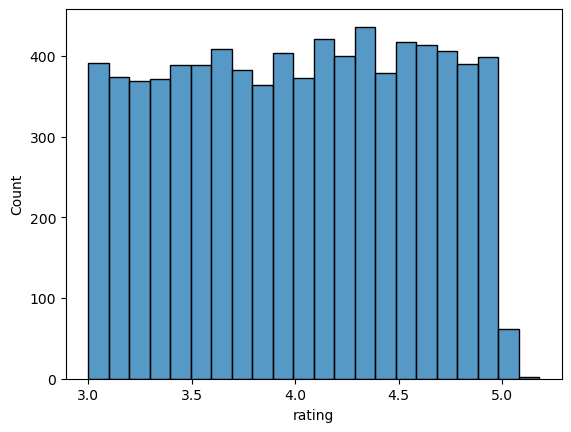

In [29]:
#visualizando los datos de la columna de rating con un histograma en seaborn
sns.histplot(data=df,x="rating")
plt.show()

In [30]:
#aislando registros con un rating mayor a 5 que es un error ya que 5 es el maximo
df[df['rating']>5.0]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,ENTIRE PLACE,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,-73.99019,Manhattan,Lower East Side
6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,PRIVATE ROOM,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,-73.93951,Brooklyn,Bedford-Stuyvesant
8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,ENTIRE PLACE,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,-73.99649,Brooklyn,Brooklyn Heights


In [31]:
#eliminando los registros con rating mayor a 5
df.drop(df[df['rating']>5.0].index, inplace=True)
df[df['rating']>5.0]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio


In [32]:
df['rating'].count()

7935

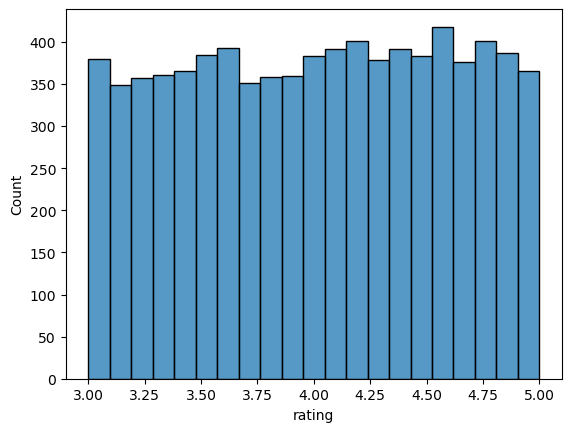

In [33]:
#visualizando los datos de la columna de rating con un histograma en seaborn
sns.histplot(data=df,x="rating")
plt.show()

hay aproximadamente 350 registros con un ranking cercano a 5 

In [34]:
#el rating mas alto 
df['rating'].max()

4.999561104773598

## Removiendo los duplicados

In [35]:
#duplicados del dataframe
df[df.duplicated(keep=False)]


,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
368,17861841,THE CREATIVE COZY ROOM,47591528,Janessa,PRIVATE ROOM,99.0,13,2019-05-23,0.52,82,4.806590,15.6,0.937422,2018-11-17,40.59211,-73.94127,Brooklyn,Sheepshead Bay
1145,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,ENTIRE PLACE,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint
1338,32610834,Manhattan by the water!,12132369,Omar,ENTIRE PLACE,150.0,0,NaT,NaN,9,NaN,NaN,NaN,2018-06-28,40.73767,-73.97384,Manhattan,Kips Bay
1658,35646737,"Private Cabins @ Chelsea, Manhattan",117365574,Maria,PRIVATE ROOM,85.0,1,2019-06-22,1.00,261,4.951714,1.2,0.671388,2018-12-17,40.74946,-73.99627,Manhattan,Chelsea
2118,33346762,2BR Apartment in Brownstone Brooklyn!,50321289,Avery,ENTIRE PLACE,140.0,4,2019-06-14,1.58,4,4.013393,4.8,0.719591,2018-12-09,40.68200,-73.95681,Brooklyn,Bedford-Stuyvesant
3007,17861841,THE CREATIVE COZY ROOM,47591528,Janessa,PRIVATE ROOM,99.0,13,2019-05-23,0.52,82,4.806590,15.6,0.937422,2018-11-17,40.59211,-73.94127,Brooklyn,Sheepshead Bay
3065,16518377,East Village 1BR Apt with all the amenities,3012457,Cody,ENTIRE PLACE,200.0,3,2018-07-10,0.16,0,4.676670,3.6,0.694443,2018-01-04,40.72350,-73.97963,Manhattan,East Village
3340,35646737,"Private Cabins @ Chelsea, Manhattan",117365574,Maria,PRIVATE ROOM,85.0,1,2019-06-22,1.00,261,4.951714,1.2,0.671388,2018-12-17,40.74946,-73.99627,Manhattan,Chelsea
5025,33831116,Sonder | Stock Exchange | Collected 1BR + Laundry,219517861,Sonder (NYC),ENTIRE PLACE,229.0,5,2019-06-15,1.92,350,4.026379,6.0,0.601737,2018-12-10,40.70621,-74.01199,Manhattan,Financial District
5077,33831116,Sonder | Stock Exchange | Collected 1BR + Laundry,219517861,Sonder (NYC),ENTIRE PLACE,229.0,5,2019-06-15,1.92,350,4.026379,6.0,0.601737,2018-12-10,40.70621,-74.01199,Manhattan,Financial District


In [36]:
#eliminando duplicados y conservando el primero
df.drop_duplicates(keep='first', inplace=True)

In [37]:
#corroborando que no hayan duplicados
df[df.duplicated(keep=False)]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 10018
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   listing_id         9997 non-null   int64         
 1   name               9992 non-null   object        
 2   host_id            9997 non-null   int64         
 3   host_name          9995 non-null   object        
 4   room_type          9997 non-null   object        
 5   price              9759 non-null   float64       
 6   number_of_reviews  9997 non-null   int64         
 7   last_review        7923 non-null   datetime64[ns]
 8   reviews_per_month  7923 non-null   float64       
 9   availability_365   9997 non-null   int64         
 10  rating             7923 non-null   float64       
 11  number_of_stays    7923 non-null   float64       
 12  5_stars            7923 non-null   float64       
 13  listing_added      9997 non-null   datetime64[ns]
 14  latitud

In [39]:
#Duplicados del mismo listing_id
df[df['listing_id'].duplicated(keep=False)]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,ENTIRE PLACE,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,ENTIRE PLACE,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens
1481,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,ENTIRE PLACE,180.0,10,2018-12-31,0.30,0,3.969729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,ENTIRE PLACE,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,PRIVATE ROOM,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant
3430,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,ENTIRE PLACE,180.0,10,2018-12-31,0.30,0,3.869729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,PRIVATE ROOM,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,ENTIRE PLACE,250.0,0,NaT,NaN,0,NaN,NaN,NaN,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg
7155,35801208,Comfy 2 bedroom Close To Manhattan,256911412,Taylor,ENTIRE PLACE,101.0,0,NaT,NaN,27,NaN,NaN,NaN,2018-10-17,40.70469,-73.93690,Brooklyn,Williamsburg
7316,31470004,Private bedroom/Bathroom in a 2 bedroom apartment,71241932,Max,PRIVATE ROOM,2500.0,0,NaT,NaN,90,NaN,NaN,NaN,2018-04-09,40.72544,-73.97818,Manhattan,East Village


In [40]:
#eliminando duplicados y conservando el primero
df.drop_duplicates(subset=['listing_id'],keep='first', inplace=True)

In [41]:
# Corroborando que no hayan duplicados
df[df['listing_id'].duplicated(keep=False)]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio


# Conclusiones

In [42]:
# el mejor airbnb 
df[df['rating']==df['rating'].max()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
9317,35901922,Charming one-bedroom apartment in Williamsburg,29569974,Raphaël,ENTIRE PLACE,89.0,1,2019-06-20,1.0,266,4.999561,1.2,0.674316,2018-12-15,40.70558,-73.9418,Brooklyn,Williamsburg


In [43]:
# el peor airbnb
df[df['rating']==df['rating'].min()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
2898,18582792,"""HELLO BROOKLYN"" PARK SIDE VIEW NEWLY RENO APT.",52403444,"R, J",ENTIRE PLACE,109.0,146,2019-06-24,5.57,21,3.000633,175.2,0.708806,2018-12-19,40.68914,-73.94556,Brooklyn,Bedford-Stuyvesant


In [44]:
# el airbnb mas caro
df[df['price']==df['price'].max()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
3858,2953058,Film Location,1177497,Jessica,ENTIRE PLACE,8000.0,1,2016-09-15,0.03,365,4.052232,1.2,0.768022,2016-03-12,40.69137,-73.96723,Brooklyn,Clinton Hill


In [45]:
# el airbnb mas barato
df[df['price']==df['price'].min()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
4645,20933849,the best you can find,13709292,Qiuchi,ENTIRE PLACE,0.0,0,NaT,NaN,0,NaN,NaN,NaN,2018-04-21,40.75091,-73.97597,Manhattan,Murray Hill
8509,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,PRIVATE ROOM,0.0,1,2018-01-06,0.05,28,3.778723,1.2,0.757915,2017-07-03,40.69023,-73.95428,Brooklyn,Bedford-Stuyvesant


In [46]:
# los airbnb mas nuevos
df[df['listing_added']==df['listing_added'].max()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
443,36209003,A homey home.,272327753,Robert,ENTIRE PLACE,200.0,2,2019-07-08,2.00,356,3.124785,2.4,0.640017,2019-01-02,40.62373,-74.02676,Brooklyn,Bay Ridge
573,27637755,Unfinished basement unit under private house,64450303,Elizabeth,ENTIRE PLACE,NaN,97,2019-07-08,8.87,7,4.234359,116.4,0.680234,2019-01-02,40.62776,-73.94137,Brooklyn,Flatlands
808,33810599,Furnished modern studio luxury elevator building,28175069,Leanne,ENTIRE PLACE,160.0,3,2019-07-08,1.38,0,3.974132,3.6,0.620053,2019-01-02,40.71138,-74.00834,Manhattan,Financial District
1102,31714168,5 min away from LGA,213014559,Kam,ENTIRE PLACE,135.0,17,2019-07-08,3.57,0,4.761431,20.4,0.818535,2019-01-02,40.76893,-73.87712,Queens,East Elmhurst
1148,25765042,Awesome Private Bushwick studio!,1290870,Gus,ENTIRE PLACE,100.0,60,2019-07-08,4.74,39,4.282310,72.0,0.765532,2019-01-02,40.69848,-73.91179,Brooklyn,Bushwick
2234,35057815,"LUXURY 2ND FL,4BR/2 FUL BTH,SLEEP 8+,15MIN-JFK...",215385823,Az,ENTIRE PLACE,325.0,4,2019-07-08,4.00,124,3.052065,4.8,0.668310,2019-01-02,40.71209,-73.80151,Queens,Jamaica Hills
2471,16424565,Modern Apartment 7 min from JFK Airport and Ca...,43197578,James,ENTIRE PLACE,NaN,2,2019-07-08,2.00,42,4.617572,2.4,0.752540,2019-01-02,40.67270,-73.81598,Queens,South Ozone Park
4149,22340384,Great Place! Great Space! Welcome 2 My BK Place!,18049970,Lou,ENTIRE PLACE,175.0,56,2019-07-08,3.00,288,4.821341,67.2,0.871003,2019-01-02,40.65948,-73.90084,Brooklyn,Brownsville
4504,25380654,"Cozy, Confortable, Modern spacious and nice Room",191621249,Geraldine,PRIVATE ROOM,99.0,95,2019-07-08,7.20,0,4.283268,114.0,0.650554,2019-01-02,40.74284,-73.99842,Manhattan,Chelsea
5413,34399221,Spacious 1 BDRM w/ Backyard of DREAMS in Manha...,6279234,Marissa,ENTIRE PLACE,148.0,1,2019-07-08,1.00,8,3.567071,1.2,0.642857,2019-01-02,40.80948,-73.95514,Manhattan,Harlem


In [47]:
# el airbnb mas viejo
df[df['listing_added']==df['listing_added'].min()]


,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
7662,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,PRIVATE ROOM,55.0,1,2011-03-28,0.01,0,4.526024,1.2,0.607339,2010-09-22,40.72488,-73.95018,Brooklyn,Greenpoint


In [48]:
# El airbnb con mas reviews
df[df['number_of_reviews']==df['number_of_reviews'].max()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
4698,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,PRIVATE ROOM,48.0,510,2019-07-06,16.22,341,4.190962,612.0,0.668985,2018-12-31,40.76335,-73.87007,Queens,East Elmhurst


In [49]:
# El airbnb con mas reviews al mes
df[df['reviews_per_month']==df['reviews_per_month'].max()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
4698,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,PRIVATE ROOM,48.0,510,2019-07-06,16.22,341,4.190962,612.0,0.668985,2018-12-31,40.76335,-73.87007,Queens,East Elmhurst


In [57]:
# El mejor airbnb de cada municipio
mejor_airbnb_municipio=df.groupby('municipio')['rating'].max()
df[df['municipio'].isin(mejor_airbnb_municipio.index) & df['rating'].isin(mejor_airbnb_municipio.values)]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,Longuitude,municipio,barrio
2060,27140232,曼哈顿帝国大厦/Time square,107245546,Michael,ENTIRE PLACE,155.0,11,2019-07-02,4.78,84,4.999229,13.2,0.848786,2018-12-27,40.74708,-73.99131,Manhattan,Chelsea
3314,7770735,Private Room close to subway (3/3),40874834,Esteban,PRIVATE ROOM,75.0,96,2019-06-22,2.06,339,4.997668,115.2,0.823695,2018-12-17,40.75421,-73.86435,Queens,Jackson Heights
5968,19661733,Private room at Stella's place,15617507,Stella,PRIVATE ROOM,39.0,57,2019-05-07,2.38,39,4.986575,68.4,0.848625,2018-11-01,40.85152,-73.86121,Bronx,Morris Park
8073,9045427,Sunrise Condominium Apartment,47198995,Diana,ENTIRE PLACE,200.0,1,2015-11-01,0.02,0,4.978383,1.2,0.720921,2015-04-28,40.61201,-74.09513,Staten Island,Grymes Hill
9317,35901922,Charming one-bedroom apartment in Williamsburg,29569974,Raphaël,ENTIRE PLACE,89.0,1,2019-06-20,1.00,266,4.999561,1.2,0.674316,2018-12-15,40.70558,-73.94180,Brooklyn,Williamsburg
